<a href="https://colab.research.google.com/github/babupallam/Supervised-Learning-Classification-Algorithms/blob/main/08_Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

  - It  is a group of simple probabilistic classifiers based on Bayes' theorem, with a strong (naive) assumption of independence between the features.


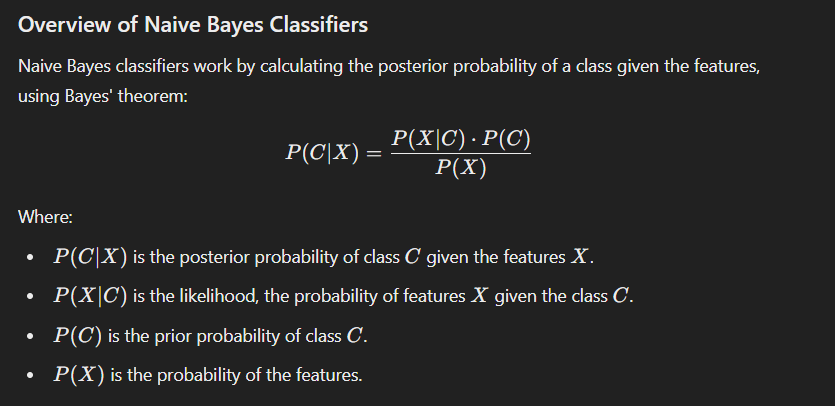



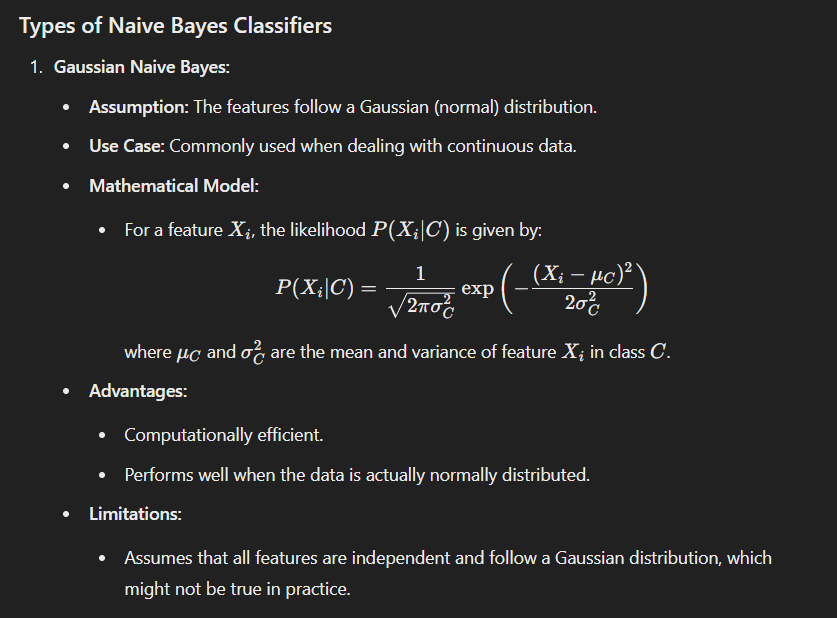

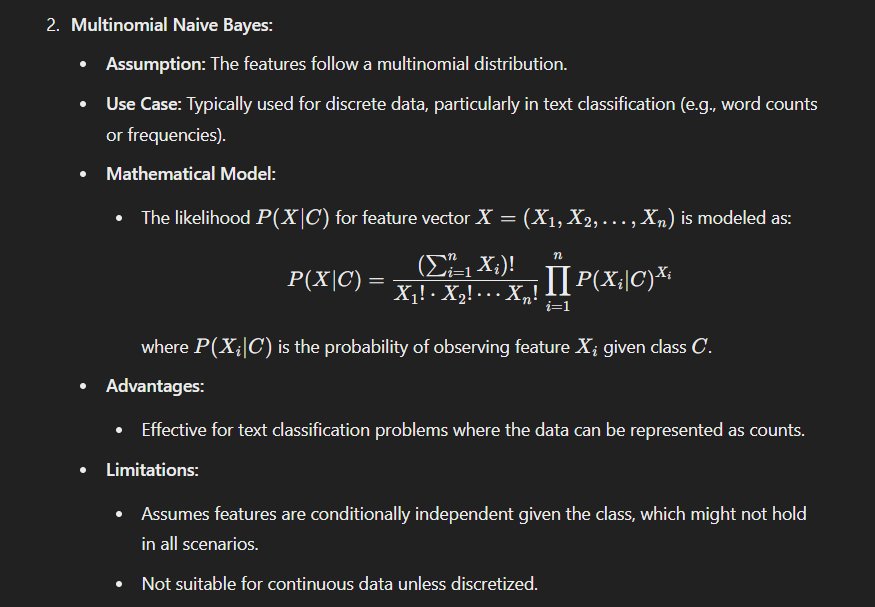

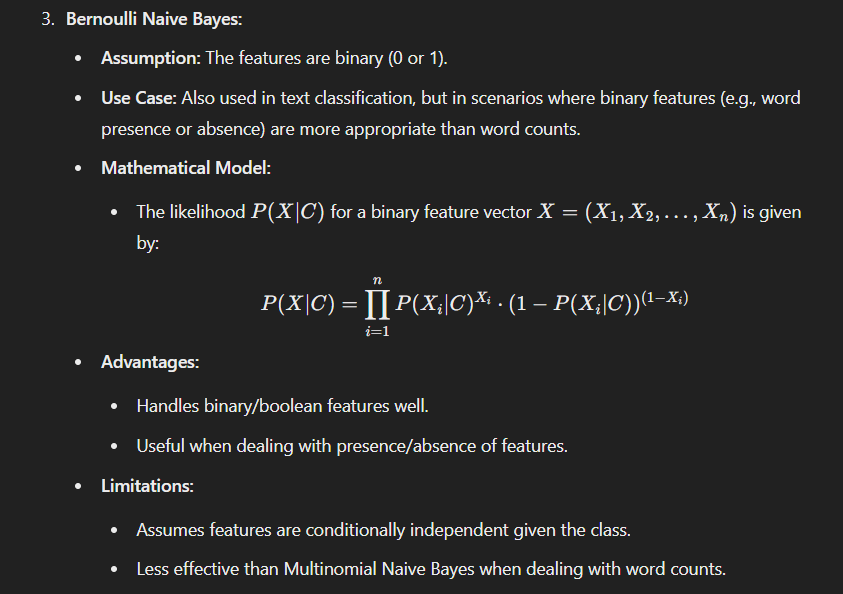


How this algorithm is being extended:

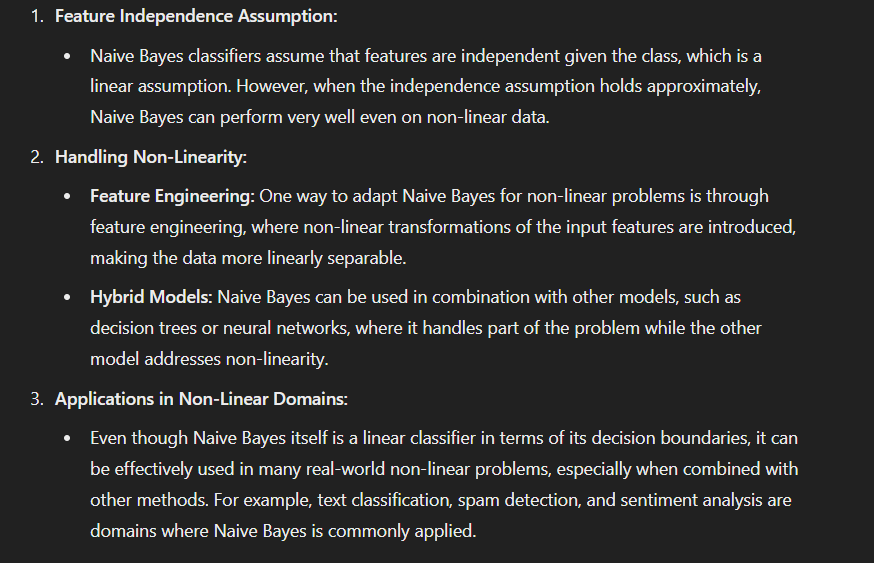



## Observation:

To illustrate the difference between a linear and non-linear application of Naive Bayes, consider the following scenarios:

### 1. Linear Naive Bayes Example

#### Scenario:
Suppose we have a dataset where the task is to classify whether a person will buy a car based on two features:
- **Income** (low, medium, high)
- **Age** (young, middle-aged, senior)

Here, the relationship between the features and the target variable (whether a person buys a car) can be linearly separable. For simplicity, assume that people with high income and middle-aged tend to buy cars, and others do not.

#### Approach:
We can use **Multinomial Naive Bayes** or **Bernoulli Naive Bayes** depending on how we encode the features:
- **Multinomial Naive Bayes** if we encode the features as categorical (e.g., 0, 1, 2 for low, medium, high income).
- **Bernoulli Naive Bayes** if we encode the features as binary (e.g., income: high or not, age: middle-aged or not).

Since the relationship is linear, Naive Bayes can effectively classify the instances with high accuracy, assuming the independence of features.

#### Visualization:
- In a 2D plot, if we plot income on the x-axis and age on the y-axis, the decision boundary would be a straight line separating the classes.

### 2. Non-Linear Naive Bayes Example

#### Scenario:
Now, consider a more complex scenario where the same task is influenced by an additional non-linear relationship. For instance:
- People buy cars only if they have a high income **and** either are young or senior, but not middle-aged (a non-linear relationship due to the "not middle-aged" condition).

#### Approach:
Directly applying **Naive Bayes** may struggle here because the relationship between features and the target variable is non-linear, which Naive Bayes models as linear due to its feature independence assumption.

**Non-Linear Solution:**
- **Feature Engineering:** We might introduce a new feature that captures the non-linear interaction, such as "not middle-aged and high income." This feature would help Naive Bayes in capturing the non-linear decision boundary.
- **Hybrid Models:** Another approach is to use Naive Bayes as part of a more complex pipeline. For instance, a decision tree or kernel-based model could first transform the feature space, and then Naive Bayes could be applied to the transformed space.

#### Visualization:
- In a 2D plot with income on the x-axis and age on the y-axis, the decision boundary would not be a straight line. Instead, it might be more complex, possibly forming a U-shape or a combination of lines to capture the "young or senior but not middle-aged" rule.

### Summary of Differences:

- **Linear Naive Bayes:** Works well when the relationship between features and the target variable can be approximated by linear decision boundaries, such as when features independently contribute to the classification.

- **Non-Linear Naive Bayes:** Requires additional steps, like feature engineering or combining with non-linear models, to capture more complex, non-linear relationships in the data.

#### Practical Example Using Text Classification:

- **Linear Example:** Classifying emails as spam or not spam based solely on the presence of specific keywords, assuming that each word independently contributes to the classification (e.g., "offer," "win," "free").

- **Non-Linear Example:** Classifying movie reviews as positive or negative where sentiment is determined not just by individual words but by their combinations and context (e.g., "not bad" is positive, even though "bad" is typically negative). A simple Naive Bayes might misclassify due to the linear assumption. Here, bigrams (two-word combinations) can be introduced to capture this non-linear relationship.

In summary, linear Naive Bayes performs well with linear relationships, while non-linear Naive Bayes scenarios require either enhanced feature engineering or integration with other models to handle complex, non-linear patterns in the data.

# Demo of Linear Naive Bayes

We'll use the GaussianNB classifier from the scikit-learn library for simplicity. This demo will involve classifying data that can be linearly separated.

Scenario: Iris Dataset Classification

- The Iris dataset is a classic dataset often used for demonstrating classification algorithms. It contains three classes of iris plants, with features describing the lengths and widths of the sepals and petals.

We'll use Naive Bayes to classify the iris species based on these features.

In [2]:

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Predict on the test data
y_pred = gnb.predict(X_test)


In [4]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9777777777777777
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



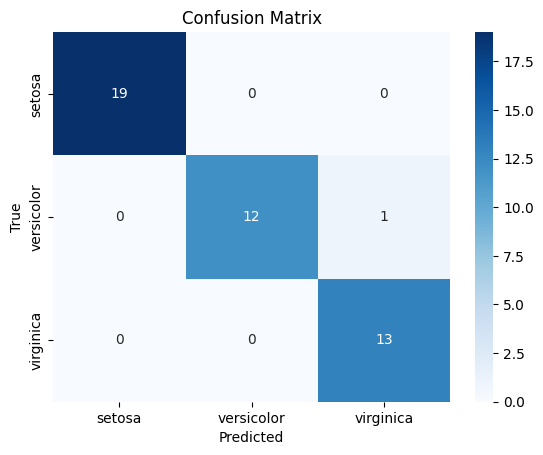

In [5]:
# Visualization of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Example Input Data

Let's say you want to classify an iris species based on the following feature values:

Sepal Length: 5.1 cm

Sepal Width: 3.5 cm

Petal Length: 1.4 cm

Petal Width: 0.2 cm

In [8]:
# Example input data (a single sample)
sample_data = [[5.1, 3.5, 1.4, 0.2]]

# Predict the class of the input data
predicted_class = gnb.predict(sample_data)
predicted_class_name = iris.target_names[predicted_class[0]]

print(f"Predicted class: {predicted_class_name}")


# The model predicts that the input sample belongs to the class 'setosa', which is one of the three iris species in the dataset.

Predicted class: setosa


# Demo of non- linear Naive Bayes

Scenario: XOR Problem

The XOR problem is a classic example of a non-linear problem where a Naive Bayes classifier would struggle without feature engineering. The XOR function returns true if and only if the inputs differ.

In [16]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer


In [17]:
# Example dataset
reviews = [
    "I loved the movie",  # Positive
    "I hated the movie",  # Negative
    "The movie was not bad",  # Positive due to "not bad"
    "The movie was terrible",  # Negative
    "It was a fantastic performance",  # Positive
    "The plot was dull and boring",  # Negative
]

labels = [1, 0, 1, 0, 1, 0]  # 1 for Positive, 0 for Negative


In [22]:
# Feature Engineering with Bigrams
#To capture non-linear patterns, we use bigrams along with unigrams (individual words).

#The CountVectorizer was set up to include bigrams (two-word combinations) in addition to unigrams (individual words). This allows the model to capture non-linear relationships like "not bad" (which is positive) as opposed to "bad" (which is negative).

# Create a CountVectorizer with bigrams
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Transform the reviews into a feature matrix
X = vectorizer.fit_transform(reviews)


In [23]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Initialize the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)


MultinomialNB()

In [24]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# New reviews to test the model
new_reviews = ["The movie was not bad at all", "I absolutely loved the film", "The movie was awful and boring"]

# Transform these reviews into feature vectors using the same vectorizer
X_new = vectorizer.transform(new_reviews)

# Predict the sentiment
predictions = model.predict(X_new)

# Display the predictions
for review, prediction in zip(new_reviews, predictions):
    sentiment = "Positive" if prediction == 1 else "Negative"
    print(f"Review: '{review}' -> Sentiment: {sentiment}")


Review: 'The movie was not bad at all' -> Sentiment: Positive
Review: 'I absolutely loved the film' -> Sentiment: Negative
Review: 'The movie was awful and boring' -> Sentiment: Negative
